<a href="https://colab.research.google.com/github/GmaxConext/GmaxConext/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
#Load libraries

import os
import numpy as np
import torch
import glob
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd


Training CNN model


In [ ]:
import cv2

In [ ]:
img = cv2.imread(r'C:\Users\maksul20\Documents\DATA_SCI\plant-pathology-2020-fgvc7/images.jpg', 1)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from __future__ import print_function
import numpy as np # For numerical fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt # plotting library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.utils import to_categorical, plot_model
import os, datetime
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from random import randint, seed
from datetime import datetime
K.clear_session()

In [ ]:
IMG_SIZE = 200
BATCH_SIZE = 64
EPOCH = 10

In [ ]:
import pandas as pd


In [ ]:
img = cv2.imread(r'C:\Users\maksul20\Documents\DATA_SCI\plant-pathology-2020-fgvc7/images.jpg', 1)

In [ ]:
import PIL

In [ ]:
img=cv2.imread(r"C:\Users\maksul20\Documents\DATA_SCI/Duiker.jpg")

In [ ]:
import numpy as np
import cv2
img=cv2.imread("/content/drive/MyDrive/Duiker.jpg")

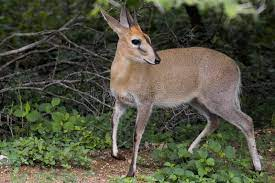

In [ ]:
cv2_imshow(img)

In [ ]:
cv2.imwrite('save_img.jpg',img)

True

CNN Model

In [ ]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from re import search
import shutil
import natsort
from PIL import Image
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define Path
MAIN_PATH = os.getcwd()
IMAGE_DIR = '../content/drive/MyDrive/Train/Train'
IMAGE_T_DIR = '../content/drive/MyDrive/Test/Test'
# Image Size for Data Generator
IMG_SIZE = 224
# Batch Size
BATCH_SIZE = 16
# Epochs
EPOCHS = 10

In [ ]:
# Train dataset
train_df = pd.read_csv("..//content/drive/MyDrive/plant-pathology-2020-fgvc7/train.csv")
# Test dataset
test_df = pd.read_csv("../content/drive/MyDrive/plant-pathology-2020-fgvc7/test.csv")


In [ ]:
# lets check the glimpse of first five rows of train dataset
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
labels = train_df.loc[:,'healthy':].columns
print(labels)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [ ]:
# lets give labels as following to separate the images into different folder as per their labels
# 'health':0 , 'multiple_diseases':1, 'rust':2, 'scab':3

def label_encoder(df, labels):
    label_counter = 0
    df['label'] = 0
    for class_name in labels:
        df['label'] = df['label'] + df[class_name] * label_counter
        label_counter += 1
    return df

In [ ]:
# Apply above function to create a label for each class
train_df = label_encoder(train_df, labels)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [ ]:
def get_label_img(img):
    ''' function to fetch the label of the image'''
    if search("Train",img):
        img=img.split('.')[0]
        label = train_df.loc[train_df['image_id']==img]['label']
        return label

In [ ]:
# lets separate the images into separate folders according to their labels
def create_dir_image_labels():
    # sort the filenames in IMAGE_DIR
    images = natsort.natsorted(os.listdir(IMAGE_DIR))
    for img in tqdm(images):
        # function to fetch the label of the image
        label = get_label_img(img)
        # image path from the original image dir
        image_path = os.path.join(IMAGE_DIR,img)

        if search("Train",img):
            # if image label is equal to 0, copy that image into healthy directory.
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(image_path, os.path.join(MAIN_PATH,'train','healthy'))

            # if image label is equal to 1, copy that image into multiple_diseases directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','multiple_diseases'))

            # if image label is equal to 2, copy that image into rust directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','rust'))

            # if image label is equal to 3, copy that image into scab directory.
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(image_path,os.path.join(MAIN_PATH,'train','scab'))

        # else copy all excluded images from the above conditions into test directory.
        elif search("Test",img):
            shutil.copy(image_path,'test')

In [ ]:
# create directory for train - healthy, multiple_diseases, rust, scab and test images
shutil.os.mkdir(os.path.join(MAIN_PATH, 'train'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','healthy'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','multiple_diseases'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','rust'))
shutil.os.mkdir(os.path.join(MAIN_PATH,'train','scab'))

shutil.os.mkdir(os.path.join(MAIN_PATH, 'test'))

In [ ]:
#Apply function to copy images belongs to their respective labels
create_dir_image_labels()

100%|██████████| 1208/1208 [00:31<00:00, 38.18it/s]


In [ ]:
# All images will be rescaled by 1.0/255
datagen=ImageDataGenerator(rescale=1.0/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)

# Path - Train Directory
Train_DIR = os.path.join(MAIN_PATH, 'train')

# Flow training images in batches of 16 using datagen generator
train_datagen=datagen.flow_from_directory(Train_DIR,
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical',
                                         subset='training')

# Flow validation images in batches of 16 using datagen generator
val_datagen=datagen.flow_from_directory(Train_DIR,
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical',
                                         subset='validation')

Found 967 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [ ]:
# Formation of CNN model

model=Sequential()
# Note the input shape is the desired size of the image 224x224 with 3 color
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
# Max Pooling Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
# Flatten the results to feed into a DNN
model.add(Flatten())
# 4 output neuron because of 4 labels in output layer
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
# Checkpoint to save the best model on the basis of validation loss
checkpoint=ModelCheckpoint('./best_weights.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
# Early Stop - if the number of epochs that is 10 without improvement of validation loss after which training will be early stopped.
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
history = model.fit(train_datagen,validation_data=val_datagen,
                                 epochs=EPOCHS,
                                 steps_per_epoch=train_datagen.samples//BATCH_SIZE,
                                 validation_steps=val_datagen.samples//BATCH_SIZE,
                                 callbacks=callbacks)

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 1.2855 - accuracy: 0.3060
Epoch 1: val_loss improved from inf to 1.24720, saving model to ./best_weights.h5
60/60 [==============================] - 61s 863ms/step - loss: 1.2855 - accuracy: 0.3060 - val_loss: 1.2472 - val_accuracy: 0.3375
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 1.2589 - accuracy: 0.3155
Epoch 2: val_loss improved from 1.24720 to 1.24085, saving model to ./best_weights.h5
60/60 [==============================] - 49s 813ms/step - loss: 1.2589 - accuracy: 0.3155 - val_loss: 1.2408 - val_accuracy: 0.3458
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 1.2508 - accuracy: 0.3186
Epoch 3: val_loss did not improve from 1.24085
60/60 [==============================] - 50s 837ms/step - loss: 1.2508 - accuracy: 0.3186 - val_loss: 1.2552 - val_accuracy: 0.3208
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 1.2464 - accuracy: 0.3417
Epoch 4: val_

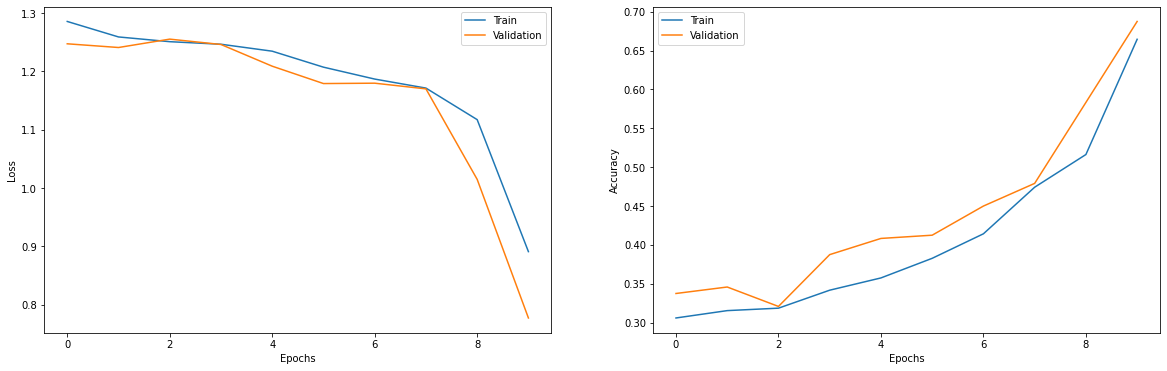

In [ ]:
plt.figure(1, figsize = (20, 6))

plt.subplot(121)
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:


def check_apple_leaf(image_test):
    DIR = os.path.join(IMAGE_DIR, image_test)
    image_result = Image.open(DIR)

    test_image = image.load_img(DIR,target_size=(IMG_SIZE,IMG_SIZE))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)

    Categories = ['healthy','multiple_disease','rust','scab']
    image_result = plt.imshow(image_result)
    plt.title(Categories[np.argmax(result)])
    plt.show()

In [ ]:
IMAGE_T_DIR = ('../content/drive/MyDrive/Test/Test.jpg')

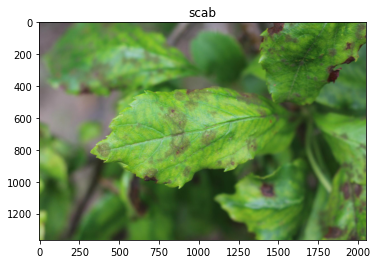

In [ ]:
check_apple_leaf('Train_65.jpg')

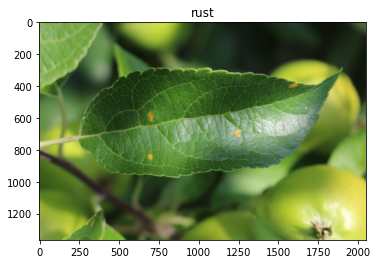

In [ ]:
check_apple_leaf('Train_10.jpg')

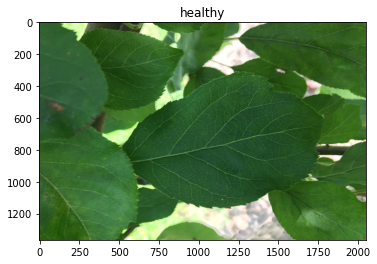

In [ ]:
check_apple_leaf('Train_772.jpg')

In [ ]:
! unzip "/content/drive/MyDrive/plant-pathology-2020-fgvc7"

In [ ]:
import tensorflow as tf
import os

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False
)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from keras.models import Sequential

In [ ]:
img = image.load_img("/content/drive/MyDrive/Train/Train/Train_0.jpg")

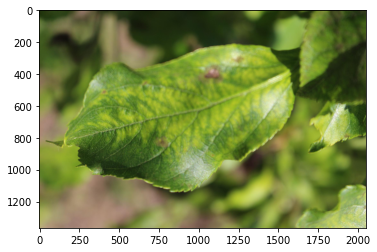

In [ ]:
plt.imshow(img)

In [ ]:
img = image.load_img("/content/drive/MyDrive/Test/Test/Test_0.jpg")

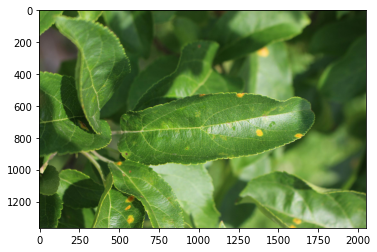

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Train/Train/Train_0.jpg")

array([[[ 13,  51,  33],
        [ 13,  51,  33],
        [ 13,  51,  33],
        ...,
        [ 27,  61,  51],
        [ 27,  61,  51],
        [ 27,  61,  51]],

       [[ 13,  51,  33],
        [ 13,  51,  33],
        [ 13,  51,  33],
        ...,
        [ 26,  60,  50],
        [ 26,  60,  50],
        [ 26,  60,  50]],

       [[ 13,  51,  33],
        [ 13,  51,  33],
        [ 13,  51,  33],
        ...,
        [ 26,  60,  50],
        [ 26,  60,  50],
        [ 26,  60,  50]],

       ...,

       [[120, 167, 181],
        [121, 168, 182],
        [121, 168, 182],
        ...,
        [152, 206, 199],
        [148, 202, 197],
        [145, 201, 196]],

       [[120, 167, 181],
        [121, 168, 182],
        [121, 168, 182],
        ...,
        [156, 207, 199],
        [153, 205, 198],
        [155, 206, 202]],

       [[120, 167, 181],
        [121, 168, 182],
        [121, 168, 182],
        ...,
        [164, 213, 205],
        [164, 212, 206],
        [168, 216, 210]]

In [ ]:
# lets check some images
train_images = train.sample(glob.glob(os.path.join(image_dir,"Train_*.jpg")),10)
train_id = [img_path.split('/')[-1] for img_path in train_images]

def convert_dummies_to_category(df):
    data = df.copy()
    s2 = data[['healthy','multiple_diseases','rust','scab']].idxmax(axis=1)
    data = pd.concat([data,s2],axis=1)
    data.rename({0:'category'},axis=1,inplace=True)
    return data

df_copy = convert_dummies_to_category(train_df)

def get_category_img(img):
    ''' function to fetch the category of the image'''
    if search("Train",img):
        img = img.split('.')[0]
        category = df_copy.loc[df_copy['image_id']==img]['category']
        return category

plt.figure(figsize=(18, 6))
for idx, img_path in enumerate(train_id):
    img_title = get_category_img(img_path)
    sp = plt.subplot(2, 5, idx+1)
    sp.axis('Off')
    complete_path = os.path.join(IMAGE_DIR,img_path)
    mp_image = mpimg.imread(complete_path)
    plt.title(img_title.values[0])
    plt.imshow(mp_image)


AttributeError: ignored

In [ ]:
train = ImageDataGenerator(rescale= 1./216,
                           shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip = True)
validation =ImageDataGenerator(rescale= 1./216,
                               shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip = True)
folder =ImageDataGenerator(rescale= 1./13,
                           shear_range = 0.2,
                           zoom_range = 0.2,
                           horizontal_flip = True)
test =ImageDataGenerator(rescale= 1./216)

In [ ]:
IMAGE_SIZE = [200,200]

In [ ]:
train_path = '/content/drive/MyDrive/Train'
test_path = '/content/drive/MyDrive/Test'
validation_path = '/content/drive/MyDrive/validation'

In [ ]:
train_df = pd.read_csv('../content/drive/MyDrive/plant-pathology-2020-fgvc7/train.csv')
test_df = pd.read_csv('../content/drive/MyDrive/plant-pathology-2020-fgvc7/test.csv')
train_df.head()


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [ ]:
import os
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}

In [ ]:
train_df.iloc[0]['image_id']

'Train_0'

In [ ]:
from sklearn.model_selection import train_test_split

train_df,validate_df = train_test_split(train_df,test_size=0.2)
new_img_size = (224,224)

In [ ]:
test_dataset = folder.flow_from_directory("/content/drive/MyDrive/Test",
                                          batch_size = 64,
                                          class_mode = 'categorical')

Found 1476 images belonging to 1 classes.


In [ ]:
train_path = train.flow_from_directory("/content/drive/MyDrive/Train",
                                          batch_size = 64,
                                          class_mode = 'categorical')

Found 1207 images belonging to 1 classes.


In [ ]:
validation_path = train.flow_from_directory("/content/drive/MyDrive/validation",
                                          batch_size = 64,
                                          class_mode = 'categorical')

Found 2781 images belonging to 1 classes.


In [ ]:
train_path.class_indices

{'Train': 0}

In [ ]:
train_path.classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
from PIL import Image
img = Image.open('../content/drive/MyDrive/Train/Train/Train_0.jpg')
nparr  = np.asarray(img)
nparr.shape
import os
label_encode = {0:"healthy",1:"multiple_diseases",2:"rust",3:"scab"}
train_df.shape
train_df.iloc[0]['image_id']


'Train_884'

In [ ]:
from sklearn.model_selection import train_test_split

train_df,validate_df = train_test_split(train_df,test_size=0.2)

In [ ]:
pred_path='/content/drive/MyDrive/Plant_preg'

CNN Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

model = tf.keras.Sequential()
model.add(layers.Dense(32, input_dim=784))
model.add(layers.Activation('relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])

In [ ]:
!pip install BatchNormalization as bn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement BatchNormalization (from versions: none)
ERROR: No matching distribution found for BatchNormalization


In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from torch.optim import Adam

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [ ]:
f_model = Sequential()
f_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
f_model.add(LeakyReLU(alpha=0.1))
f_model.add(MaxPooling2D((2, 2),padding='same'))
f_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
f_model.add(LeakyReLU(alpha=0.1))
f_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
f_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
f_model.add(LeakyReLU(alpha=0.1))
f_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
f_model.add(Flatten())
f_model.add(Dense(128, activation='linear'))
f_model.add(LeakyReLU(alpha=0.1))
f_model.add(Dense(num_classes, activation='softmax'))

model.build()


In [ ]:
f_model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
f_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms import transforms
import numpy as np
from torch.autograd import Variable
from torchvision.models import squeezenet1_1
import torch.functional as F
from io import open
import os
from PIL import Image
import pathlib
import glob
import cv2

In [ ]:
#categories
root=pathlib.Path(pred_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [ ]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=6):
        super(ConvNet,self).__init__()

        #Output size after convolution filter
        #((w-f+2P)/s) +1

        #Input shape= (255,3,200,200)

        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (256,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (256,12,150,150)
        self.relu1=nn.ReLU()
        #Shape= (256,12,150,150)

        self.pool=nn.MaxPool2d(kernel_size=2)
        #Reduce the image size be factor 2
        #Shape= (256,12,75,75)


        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (256,20,75,75)
        self.relu2=nn.ReLU()
        #Shape= (256,20,75,75)



        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #Shape= (256,32,75,75)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #Shape= (256,32,75,75)
        self.relu3=nn.ReLU()
        #Shape= (256,32,75,75)


        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



        #Feed forwad function

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)

        output=self.pool(output)

        output=self.conv2(output)
        output=self.relu2(output)

        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)


            #Above output will be in matrix form, with shape (256,32,75,75)

        output=output.view(-1,32*75*75)


        output=self.fc(output)

        return output

In [ ]:
#Transforms
transformer=transforms.Compose([
    transforms.Resize((200,200)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

In [ ]:
#prediction function
def prediction(img_path,transformer):

    image=Image.open(img_path)

    image_tensor=transformer(image).float()


    image_tensor=image_tensor.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor.cuda()

    input=Variable(image_tensor)


    output=model(input)

    index=output.data.numpy().argmax()

    pred=classes[index]

    return pred

In [ ]:
history = f_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    batch_size=32,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1,
    epochs=10
    ,callbacks=[es]
)

In [ ]:
images_path=glob.glob(pred_path+'/*.jpg')

In [ ]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/')+1:]]=prediction(i,transformer)

In [ ]:
pred_dict

In [ ]:
f_model.compile(
    optimizer='adam',
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
f_model.compile(optimizer='sgd', loss='mse')

In [ ]:
train_df['label'] = train_df.apply(lambda x: np.argmax(x[1:]),axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

train_df,validate_df = train_test_split(train_df,test_size=0.2)

In [ ]:
model = tf.keras.models.Sequential()
([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                                     tf.keras.layers.MaxPooling2D(2,2),
  #to increase the number of channels
                                     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     #
                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                     tf.keras.layers.MaxPooling2D(2,2)
                                     ])

In [ ]:
                                     ##
                                     tf.keras.layers.Dense(512,activation= 'relu'),
                                     ##
                                     tf.keras.layers.Dense(1,activation= 'softmax')

In [ ]:
from keras.models import Model

In [ ]:
model = Sequential

In [ ]:
import pathlib

In [ ]:
model.compile.optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss='categorical_crossentropy',
matrics=['accuracy']

In [ ]:
f_model.summary()

copied code


In [ ]:
#Load libraries
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns

In [ ]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
#Transforms
transformer=transforms.Compose([
    transforms.Resize((200,200)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [ ]:
#Dataloader

#Path for training and testing directory
train_path = '/content/drive/MyDrive/Train'
test_path = '/content/drive/MyDrive/Test'
data_path = '/content/drive/MyDrive/validation/Validation'
pred_path = '/content/drive/MyDrive/validation/Validation/pred'
train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=32, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)

In [ ]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [ ]:
#CNN Network


class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()

        #Output size after convolution filter
        #

        self.conv1=nn.Conv2d(in_channels=3,out_channels=4,kernel_size=4,stride=1,padding=1)
        #
        self.bn1=nn.BatchNorm2d(num_features=3)
        #
        self.relu1=nn.ReLU()
        #

        self.pool=nn.MaxPool2d(kernel_size=2)
        #


        self.conv2=nn.Conv2d(in_channels=4,out_channels=20,kernel_size=4,stride=1,padding=1)
        #S
        self.relu2=nn.ReLU()

        self.conv3=nn.Conv2d(in_channels=12,out_channels=32,kernel_size=4,stride=1,padding=1)
        #
        self.bn3=nn.BatchNorm2d(num_features=32)
        #
        self.relu3=nn.ReLU()
        #

        self.fc=nn.Linear(in_features=25 * 25 * 32,out_features=num_classes)



        #Feed forwad function

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)

        output=self.pool(output)

        output=self.conv2(output)
        output=self.relu2(output)

        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)

        output=self.conv4(output)
        output=self.bn4(output)
        output=self.relu4(output)

            #Above output will be in matrix form, with shape (256,32,75,75)

        output=output.view(-1,32*25*25)


        output=self.fc(output)

        return

from torch._C import Node
#Train the CNN model

#plot the training and validation accuracy and loss at each epoch
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)

# test
test_images = []
test_labels = []
for directory_path in glob.glob("images/natural/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

##
num_epochs=10
#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

# test
test_images = []
test_labels = []
for directory_path in glob.glob("images/natural/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
f_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = f_model.fit(train_path, train_labels, epochs=10,
                    validation_data=(test_path, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = f_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
f_model.compile.optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss='categorical_crossentropy',
matrics=['accuracy']
f_model.summary()

In [ ]:
num_epochs=10

In [ ]:
#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [ ]:
print(train_count, test_count)

In [ ]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob("images/natural/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:

        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()


        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)

        train_accuracy+=int(torch.sum(prediction==labels.data))

train_accuracy=train_accuracy/train_count
train_loss=train_loss/train_count


    # Evaluation on testing dataset
model.eval()

test_accuracy=0.0
for i, (images,labels) in enumerate(test_loader):
  if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

            outputs=model(images)
_,prediction=torch.max(outputs.data,1)
test_accuracy+=int(torch.sum(prediction==labels.data))

test_accuracy=test_accuracy/test_count


print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))

    #Save the best model
if test_accuracy>best_accuracy:
  torch.save(model.state_dict(),'best_checkpoint.model')
  best_accuracy=test_accuracy